In [12]:
from pypinyin import pinyin,lazy_pinyin
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns

from io import StringIO
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfinterp import process_pdf
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
import re

def read_pdf(file_path):
    """
    读取pdf文件
    """
    with open(file_path,'rb') as file:
        resource_manager = PDFResourceManager()
        return_str = StringIO()
        lap_params = LAParams()
        device = TextConverter(resource_manager,return_str,laparams=lap_params)
        process_pdf(resource_manager,device,file)
        device.close()
        content = return_str.getvalue()
        return_str.close()
        return re.sub('\s+','',content) 

content = read_pdf('./input.pdf')
quanpin = lazy_pinyin(
    content,
    errors='ignore'
)

        num
chars      
i      7481
n      5753
e      5325
a      4372
h      4330
u      3655
g      3622
o      2762
d      2425
z      2245
j      1736
s      1565
y      1503
c      1051
l       813
x       795
b       712
t       633
m       629
w       451
q       441
f       434
r       423
k       167
p       134
v        27


<BarContainer object of 26 artists>

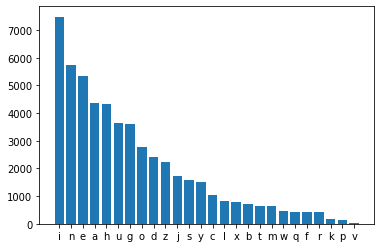

In [13]:
quanpin_str = "".join(quanpin)
quanpin_list = list(quanpin_str)
df_qp = pd.DataFrame({'chars': quanpin_list})
df_qp['num'] = 1
# 统计每个字母出现的个数 并按照降序排序
df_qp_sum = df_qp.groupby('chars').sum().sort_values('num',ascending=False)
print(df_qp_sum)
# 绘制柱状图
plt.bar(df_qp_sum.index,df_qp_sum['num'])

In [18]:
with open('./www/default.html', 'r') as fr:
    default_page = fr.read()
    with open('./www/result.html', 'w') as fw:
        fw.write('<div id="inputarea">')
        fw.write('<textarea id="typefield">')
        # 将获得的拼音输入到页面中的文本框中
        fw.write(" ".join(quanpin))
        fw.write('</textarea>')
        fw.write('</div>')
        fw.write(default_page)

In [14]:
# 根据标准差可以判断均衡情况
df_qp_sum.describe()

,num
count,26.000000
mean,2057.076923
std,2025.066121
min,27.000000
25%,495.500000
50%,1277.000000
75%,3407.000000
max,7481.000000


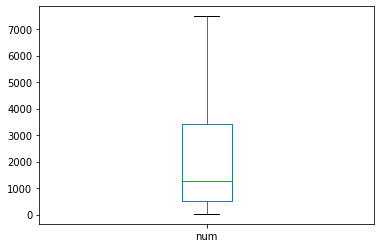

In [15]:
# 箱型图可以更直观表示
df_qp_sum.plot.box()

In [73]:
# 输入效率的评估指标
# v[0]表示按键在第几行，v[1]表示所在列，v[2]表示左手还是右手
key = {
    'q':[0,0.0,0],
    'w':[0,1.0,0],
    'e':[0,2.0,0],
    'r':[0,3.0,0],
    't':[0,4.0,0],
    'y':[0,5.0,1],
    'u':[0,6.0,1],
    'i':[0,7.0,1],
    'o':[0,8.0,1],
    'p':[0,9.0,1],
    'a':[1,0.25,0],
    's':[1,2.25,0],
    'd':[1,3.25,0],
    'f':[1,4.25,0],
    'g':[1,5.25,1],
    'h':[1,6.25,1],
    'j':[1,7.25,1],
    'k':[1,8.25,1],
    'l':[1,9.25,1],
    'z':[2,0.5,0],
    'x':[2,1.5,0],
    'c':[2,2.5,0],
    'v':[2,3.5,0],
    'b':[2,4.5,1],
    'n':[2,5.5,1],
    'm':[2,6.5,1]
}

In [80]:
# 效率
from math import sqrt,pow
def cal_dis(s):
    left = []
    right = []
    res = 0.0
    for i in range(0,len(s)):
        if(key[s[i]][2] == 0):
            if(right == []):
                right = key[s[i]]
            else:
                res += sqrt(pow(key[s[i]][0]-right[0],2)+pow(key[s[i]][1]-right[1],2))
                right = key[s[i]]
        if(key[s[i]][2] == 1):
            if(left == []):
                left = key[s[i]]
            else:
                res += sqrt(pow(key[s[i]][0]-left[0],2)+pow(key[s[i]][1]-left[1],2))
                left = key[s[i]]
    return res

res = cal_dis(quanpin_list)
res

91465.61561787303

In [9]:
# 声母和韵母
shengmu = lazy_pinyin(
    content,
    errors='ignore',
    style=3,
    strict=False,
    v_to_u=False
)

yunmu = lazy_pinyin(
    content,
    errors='ignore',
    style=5,
    strict=False,
    v_to_u=False
)

df_sm = pd.DataFrame({'chars': shengmu})
df_sm['num'] = 1
df_sm_sum = df_sm.groupby('chars').sum().sort_values('num',ascending=False)
print(df_sm_sum)

df_ym = pd.DataFrame({'chars': yunmu})
df_ym['num'] = 1
df_ym_sum = df_ym.groupby('chars').sum().sort_values('num',ascending=False)
print(df_ym_sum)

        num
chars      
d      2425
j      1736
y      1503
zh     1384
sh     1371
g       945
z       861
ch      820
l       813
x       795
h       755
b       712
t       633
m       629
w       451
q       441
f       434
r       317
n       235
c       231
s       194
k       167
p       134
        132
        num
chars      
i      3463
e      2705
u      1352
ong     986
an      928
en      711
ie      683
ai      672
eng     662
a       595
uo      534
ou      495
ian     460
ui      442
ing     427
ang     395
ao      372
ei      329
uan     293
in      291
iao     274
un      158
iang    150
iu      147
ue      127
ia      126
er      106
o        97
uang     53
ua       41
v        25
uai      13
iong      4
ve        2


34

24
34


<BarContainer object of 24 artists>

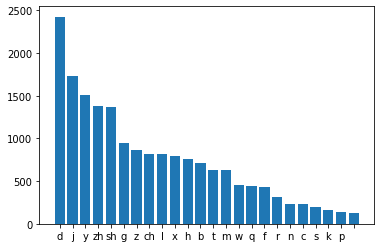

In [17]:
# 根据pypinyin库中的提示，将y和w作为声母
# 有23个声母，34个韵母

print(len(df_sm_sum)) # ""表示改字没有声母只有韵母 因此在之后的设计中也得特别注意
print(len(df_ym_sum))
plt.bar(df_sm_sum.index,df_sm_sum['num'])

<BarContainer object of 34 artists>

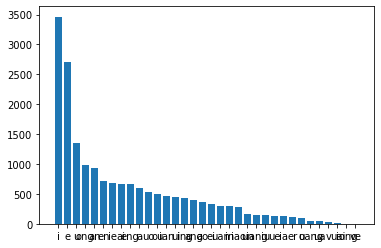

In [18]:
plt.bar(df_ym_sum.index,df_ym_sum['num'])

In [66]:
# 双拼输入法 将输入的第一个字母作为声母，第二个字母作为韵母
# 由于声母的个数比26个字母要多 因此可能会有重码的情况 但为了简化忽略重码时选择文字的时间
# 原26个字母按照原来的规则作为声母或者韵母
# 将统计的得到的出现最多的声母按键分配出现最少的韵母
category = {}
sm_list = list(df_sm_sum.index)
sm_list = sm_list[0:-1]
for i in range(0,len(sm_list)):
    if sm_list[i] == 'zh':
        category.update({'zh':'o'})
        continue
    if sm_list[i] == 'sh':
        category.update({'sh':'v'})
        continue
    if sm_list[i] == 'ch':
        category.update({'ch':'a'})
        continue
    category.update({sm_list[i]:sm_list[i]})

sm_list_re = sm_list[::-1]
l = len(sm_list_re)
j = 0
ym_list = list(df_ym_sum.index)
slist = ['i','e','u','a','0']
for i in range(0,len(ym_list)):
    while sm_list_re[j%l] == 'ch' or sm_list_re[j%l] == 'sh' or sm_list_re[j%l] == 'zh':
        j += 1
    if ym_list[i] in slist:
        category.update({ym_list[i]:ym_list[i]})
    else:
        category.update({ym_list[i]:sm_list_re[j%l]})
        j += 1

# 有的文字会只有韵母没有声母的情况 单独考虑
special_categroy = {
    'a': 'aa',
    'ai': 'ai',
    'an': 'an',
    'ang': 'ah',
    'ao': 'ao',
    'e': 'ee',
    'ei': 'ei',
    'en': 'en',
    'er': 'er',
    'eng': 'eg',
    'o': 'oo',
    'ou': 'ou',
}
category

{'d': 'd',
 'j': 'j',
 'y': 'y',
 'zh': 'o',
 'sh': 'v',
 'g': 'g',
 'z': 'z',
 'ch': 'a',
 'l': 'l',
 'x': 'x',
 'h': 'h',
 'b': 'b',
 't': 't',
 'm': 'm',
 'w': 'w',
 'q': 'q',
 'f': 'f',
 'r': 'r',
 'n': 'n',
 'c': 'c',
 's': 's',
 'k': 'k',
 'p': 'p',
 'i': 'i',
 'e': 'e',
 'u': 'u',
 'ong': 'p',
 'an': 'k',
 'en': 's',
 'ie': 'c',
 'ai': 'n',
 'eng': 'r',
 'a': 'a',
 'uo': 'f',
 'ou': 'q',
 'ian': 'w',
 'ui': 'm',
 'ing': 't',
 'ang': 'b',
 'ao': 'h',
 'ei': 'x',
 'uan': 'l',
 'in': 'z',
 'iao': 'g',
 'un': 'y',
 'iang': 'j',
 'iu': 'd',
 'ue': 'p',
 'ia': 'k',
 'er': 's',
 'o': 'c',
 'uang': 'n',
 'ua': 'r',
 'v': 'f',
 'uai': 'q',
 'iong': 'w',
 've': 'm'}

In [81]:
def changeCode(x):
    # 没有声母
    if x[0] == "":
        return special_categroy[x[1]]
    else:
        return category[x[0]] + category[x[1]]

change_res = list(map(changeCode, zip(shengmu,yunmu)))

change_str = "".join(change_res)
change_list = list(change_str)
df_ch = pd.DataFrame({'chars': change_list})
df_ch['num'] = 1
df_ch_sum = df_ch.groupby('chars').sum().sort_values('num',ascending=False)
df_ch_sum.describe()
print(cal_dis(change_list))

70233.68875846446


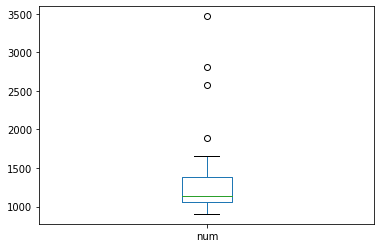

In [69]:
df_ch_sum.plot.box()

<BarContainer object of 26 artists>

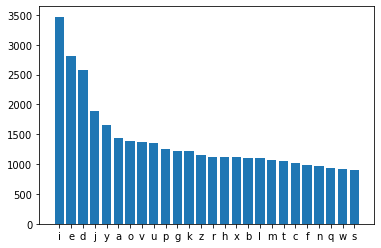

In [68]:
# 修改后的柱状图
plt.bar(df_ch_sum.index,df_ch_sum['num'])

In [65]:
with open('./www/default.html', 'r') as fr:
    default_page = fr.read()
    with open('./www/change.html', 'w') as fw:
        fw.write('<div id="inputarea">')
        fw.write('<textarea id="typefield">')
        # 将获得的拼音输入到页面中的文本框中
        fw.write(" ".join(change_res))
        fw.write('</textarea>')
        fw.write('</div>')
        fw.write(default_page)